# 📊 Exploratory Data Analysis (EDA)
## Project: Visualizing US Natural Disaster Declarations

This notebook performs a structured Exploratory Data Analysis (EDA) on the US Natural Disaster Declarations dataset.

### 🎯 Objectives:
- Understand dataset structure
- Analyze yearly disaster trends
- Examine incident type distribution
- Identify top affected states
- Perform seasonality analysis
- Study incident trends over time

All visualizations are saved in the project Visuals folder.


In [1]:
# Import the required libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Set path where charts will be saved
visuals_path = r"D:\My Project\Visualizing US Natural Disaster Declarations\Visuals"
os.makedirs(visuals_path, exist_ok=True)

print("Libraries imported successfully.")


Libraries imported successfully.


In [2]:
# load the cleaned dataset
df=pd.read_csv(r"D:\My Project\Visualizing US Natural Disaster Declarations\Data\processed\disaster_declarations_summaries_cleaned.csv")

In [3]:
# Dataset overview
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe())
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())
# Checks the datatypes of the columns
print("\nData Types:")
print(df.dtypes)
# Column names
print("\nColumn Names:")
print(df.columns)

Dataset Shape: (69615, 29)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69615 entries, 0 to 69614
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   femadeclarationstring     69615 non-null  object
 1   disasternumber            69615 non-null  int64 
 2   state                     69615 non-null  object
 3   declarationtype           69615 non-null  object
 4   declarationdate           69615 non-null  object
 5   fydeclared                69615 non-null  int64 
 6   incidenttype              69615 non-null  object
 7   declarationtitle          69615 non-null  object
 8   ihprogramdeclared         69615 non-null  int64 
 9   iaprogramdeclared         69615 non-null  int64 
 10  paprogramdeclared         69615 non-null  int64 
 11  hmprogramdeclared         69615 non-null  int64 
 12  incidentbegindate         69615 non-null  object
 13  incidentenddate           68094 no

In [4]:
# create year and month columns from the declaration date
df['declarationdate'] = pd.to_datetime(df['declarationdate'])
df['year'] = df['declarationdate'].dt.year
df['month'] = df['declarationdate'].dt.month
# get the month name from the month number
df['declarationmonthname'] = df['declarationdate'].dt.strftime('%B')

In [5]:
# display the first few rows of the dataset to verify the new columns
print("\nFirst 5 rows of the dataset with new columns:")
print(df.head())


First 5 rows of the dataset with new columns:
  femadeclarationstring  disasternumber state declarationtype  \
0            FM-5529-OR            5529    OR              FM   
1            FM-5528-OR            5528    OR              FM   
2            FM-5527-OR            5527    OR              FM   
3            DR-4312-CA            4312    CA              DR   
4            DR-4251-AL            4251    AL              DR   

            declarationdate  fydeclared  incidenttype  \
0 2024-08-09 00:00:00+00:00        2024          Fire   
1 2024-08-06 00:00:00+00:00        2024          Fire   
2 2024-08-02 00:00:00+00:00        2024          Fire   
3 2017-05-02 00:00:00+00:00        2017  Severe Storm   
4 2016-01-21 00:00:00+00:00        2016  Severe Storm   

                                    declarationtitle  ihprogramdeclared  \
0                                     LEE FALLS FIRE                  0   
1                                      ELK LANE FIRE                 

## 📈 Step 4: Total Disaster Declarations by Year

This chart shows the yearly trend of disaster declarations.


C:\Users\onkar devkar\AppData\Local\Temp\ipykernel_30496\1883156838.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=df, palette='viridis')


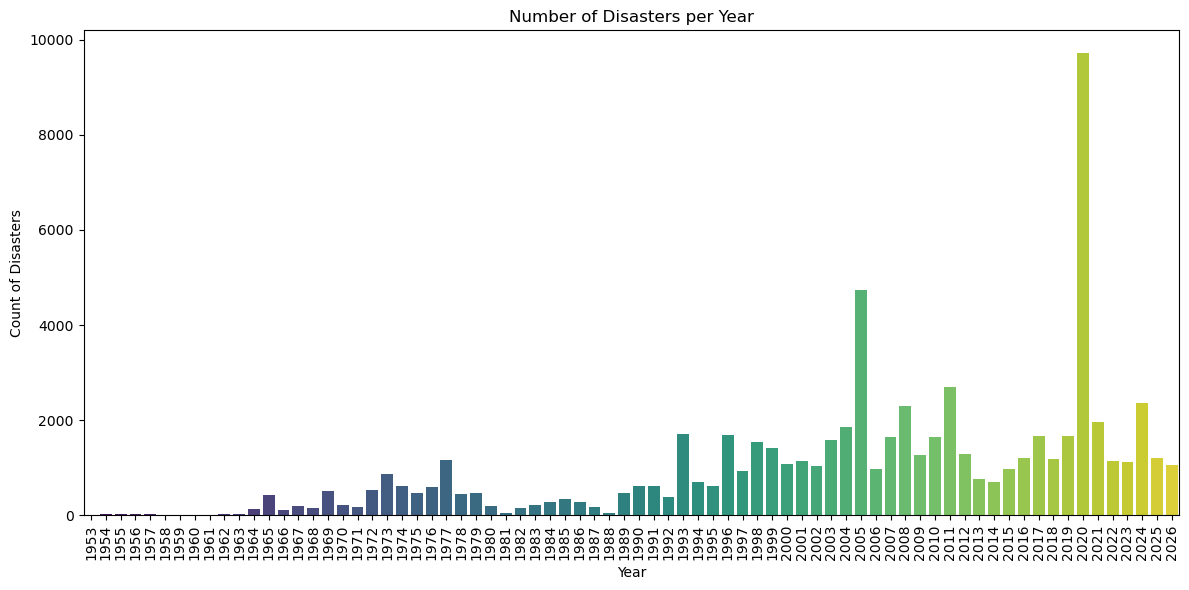

In [6]:
# Disaster per year
plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=df, palette='viridis')
plt.title('Number of Disasters per Year')
plt.xlabel('Year')
plt.ylabel('Count of Disasters')
plt.xticks(rotation=90)
plt.tight_layout()


plt.savefig(os.path.join(visuals_path, "01_Total_Declarations_by_Year.png"))
plt.show()

## 📅 Step 7: Monthly Trend (Seasonality Analysis)

This analysis helps us understand whether disasters are seasonal.


C:\Users\onkar devkar\AppData\Local\Temp\ipykernel_30496\2636843082.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='declarationmonthname', data=df, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], palette='coolwarm')


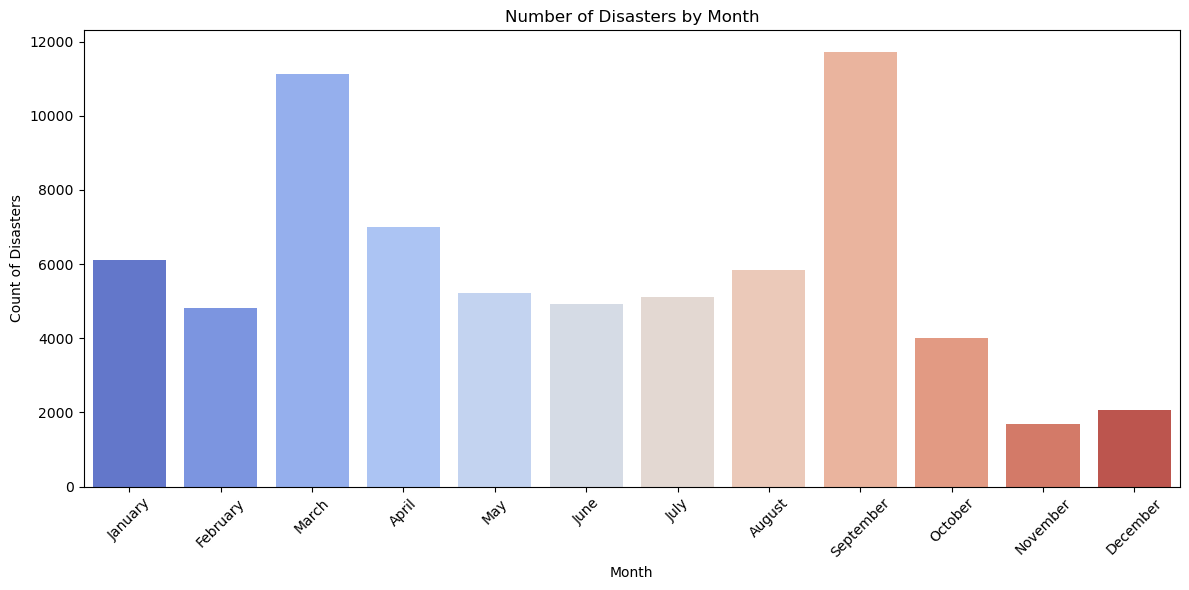

In [9]:
# Monthly seasonality of disasters
plt.figure(figsize=(12, 6))
sns.countplot(x='declarationmonthname', data=df, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], palette='coolwarm')
plt.title('Number of Disasters by Month')
plt.xlabel('Month')
plt.ylabel('Count of Disasters')
plt.xticks(rotation=45)
plt.tight_layout()


plt.savefig(os.path.join(visuals_path, "04_Monthly_Trend.png"))
plt.show()

## 🌪 Step 5: Incident Type Distribution

This visualization shows which types of disasters occur most frequently.


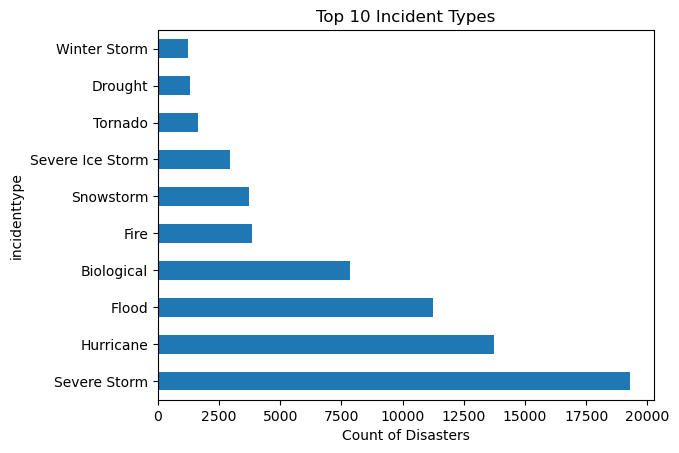

In [7]:
# Top 10 incident types
incident_counts = df["incidenttype"].value_counts().head(10)

plt.figure()
incident_counts.plot(kind="barh")
plt.title("Top 10 Incident Types")
plt.xlabel("Count of Disasters")

plt.savefig(os.path.join(visuals_path, "02_Incident_Type_Distribution.png"))
plt.show()


## 📊 Step 8: Incident Type Trend Over Time

This chart shows how different disaster types vary across years.


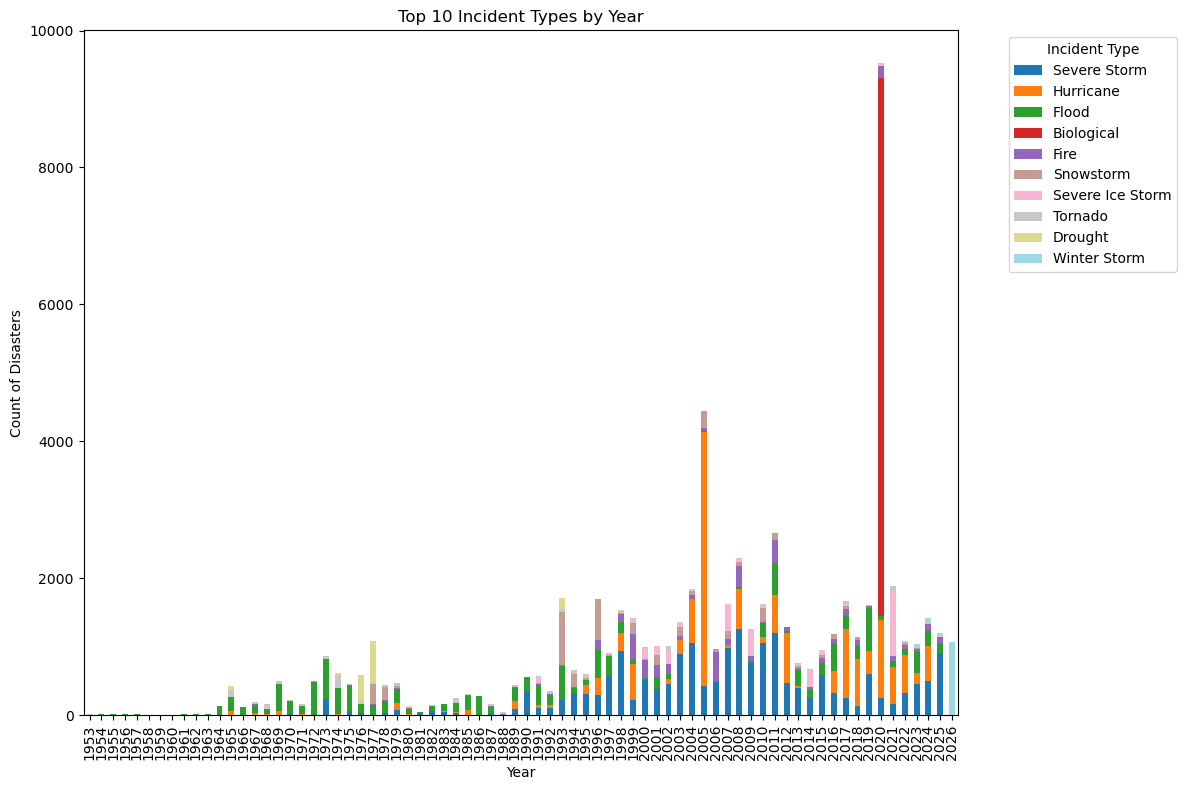

In [10]:
# top 10 incident types by year
top_incidents_by_year = df.groupby(['year', 'incidenttype']).size().unstack(fill_value=0)
top_incidents_by_year = top_incidents_by_year[top_incidents_by_year.sum(axis=0).sort_values(ascending=False).head(10).index]
plt.figure(figsize=(12, 8))
top_incidents_by_year.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())
plt.title('Top 10 Incident Types by Year')
plt.xlabel('Year')
plt.ylabel('Count of Disasters')
plt.legend(title='Incident Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.savefig(os.path.join(visuals_path, "05_Incident_Trend_Over_Years.png"))
plt.show()

## 🗺 Step 6: Top 10 States by Disaster Declarations

This chart highlights the most disaster-prone states.


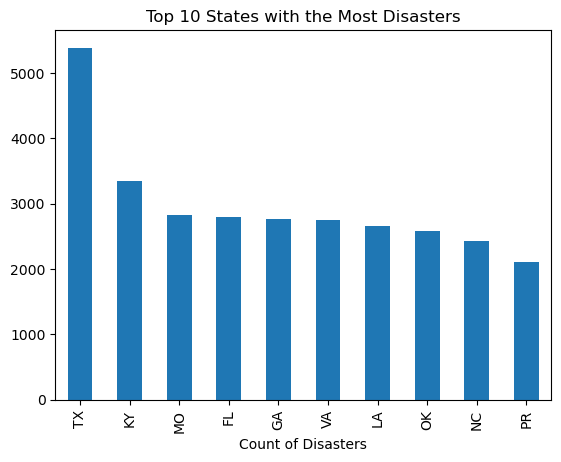

In [8]:
# top 10 state with the most disasters
state_counts = df["state"].value_counts().head(10)
plt.figure()
state_counts.plot(kind="bar")
plt.title("Top 10 States with the Most Disasters")
plt.xlabel("Count of Disasters")

plt.savefig(os.path.join(visuals_path, "03_Top_10_States.png"))
plt.show()

C:\Users\onkar devkar\AppData\Local\Temp\ipykernel_32380\741482998.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=df, palette='Set2')


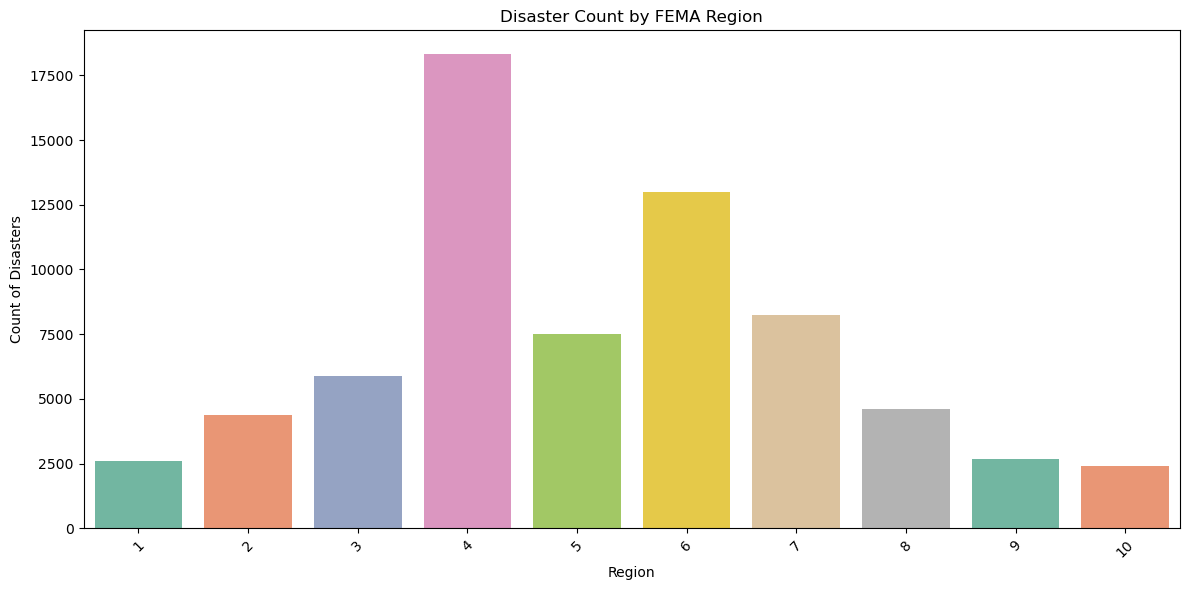

In [15]:
# regional distribution of disasters
plt.figure(figsize=(12, 6))
sns.countplot(x='region', data=df, palette='Set2')
plt.title('Disaster Count by FEMA Region')
plt.xlabel('Region')
plt.ylabel('Count of Disasters')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# program declared counts
ia_count = df["iaprogramdeclared"].sum()
pa_count = df["paprogramdeclared"].sum()
hm_count = df["hmprogramdeclared"].sum()

print("IA Declared:", ia_count)
print("PA Declared:", pa_count)
print("HM Declared:", hm_count)


IA Declared: 17187
PA Declared: 65132
HM Declared: 30021


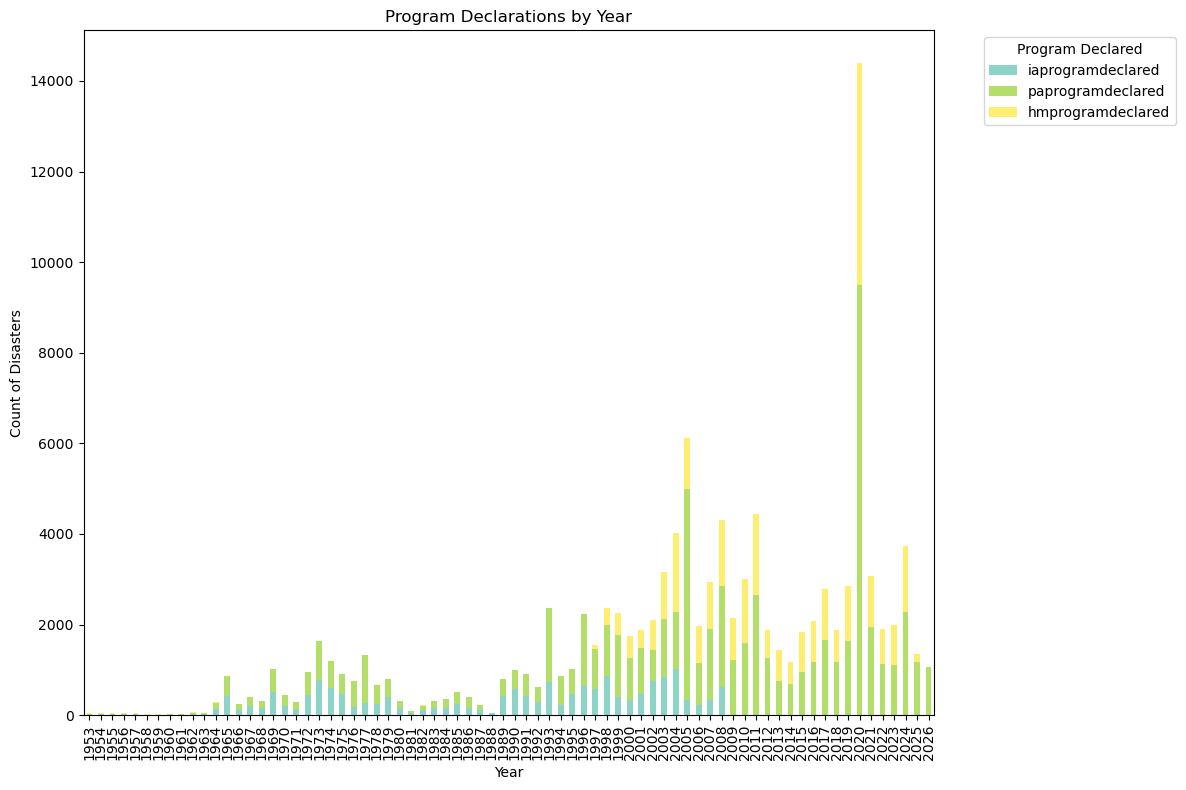

In [17]:
# program declared counts by year
programs_by_year = df.groupby('year')[['iaprogramdeclared', 'paprogramdeclared', 'hmprogramdeclared']].sum()
programs_by_year.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set3')
plt.title('Program Declarations by Year')
plt.xlabel('Year')
plt.ylabel('Count of Disasters')
plt.legend(title='Program Declared', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

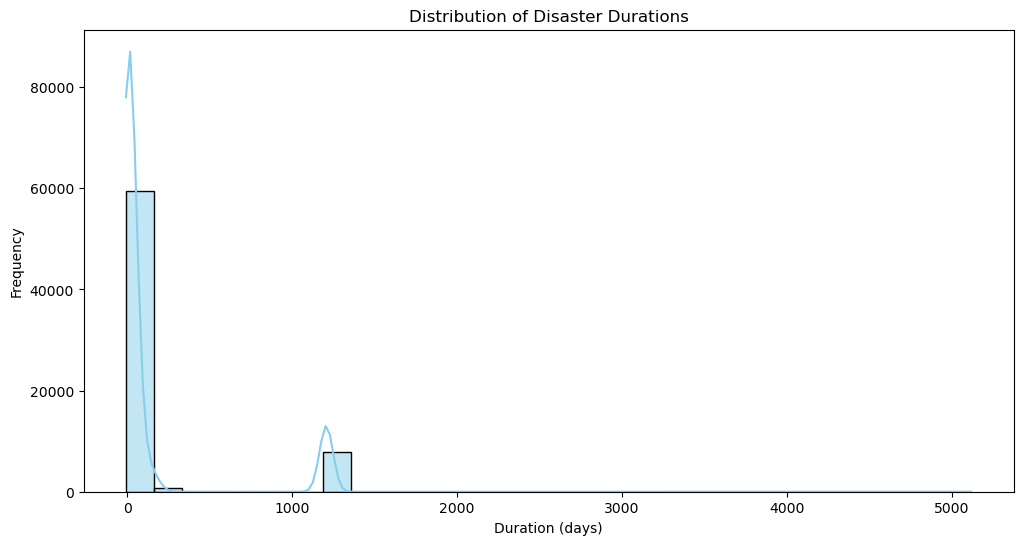

In [23]:
# Disaster duration analysis
df['disasterduration'] = (pd.to_datetime(df['incidentenddate']) - pd.to_datetime(df['incidentbegindate'])).dt.days
plt.figure(figsize=(12, 6))
sns.histplot(df['disasterduration'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Disaster Durations')
plt.xlabel('Duration (days)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df["disasterDuration"] = (
    pd.to_datetime(df["incidentenddate"]) - pd.to_datetime(df["incidentbegindate"])
).dt.days

print("Average Duration:", df["disasterDuration"].mean().__round__())
print("Max Duration:", df["disasterDuration"].max())


Average Duration: 159.20327782183452
Max Duration: 5117.0


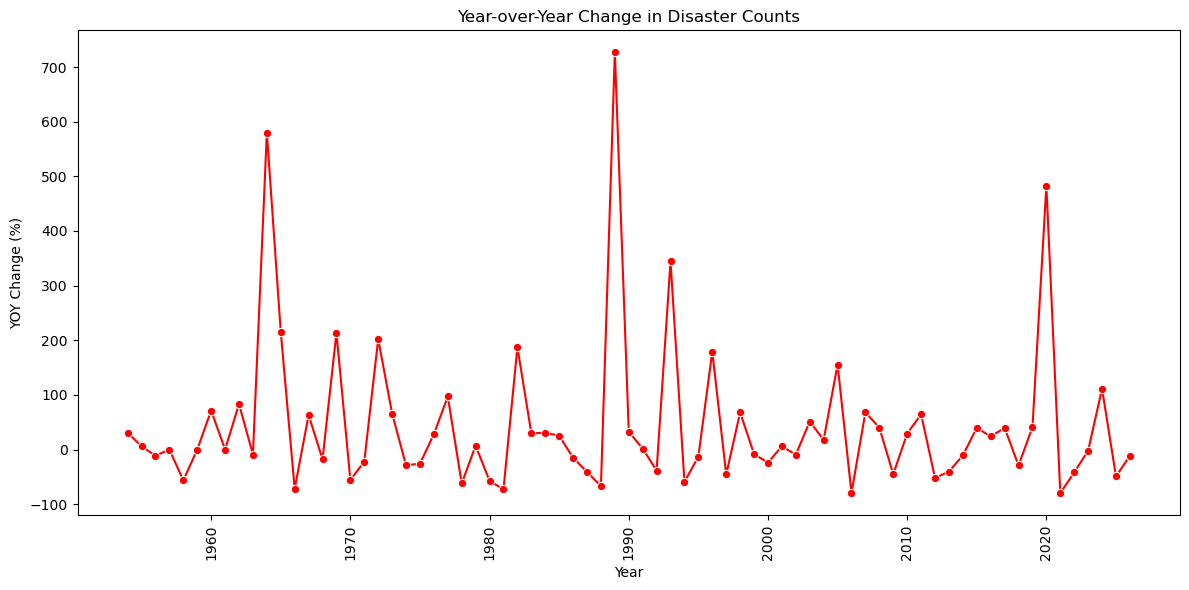

In [24]:
# YOY change in disaster counts
disasters_by_year = df.groupby('year').size()
yoy_change = disasters_by_year.pct_change() * 100
plt.figure(figsize=(12, 6))
sns.lineplot(x=disasters_by_year.index, y=yoy_change, marker='o', color='red')
plt.title('Year-over-Year Change in Disaster Counts')
plt.xlabel('Year')
plt.ylabel('YOY Change (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

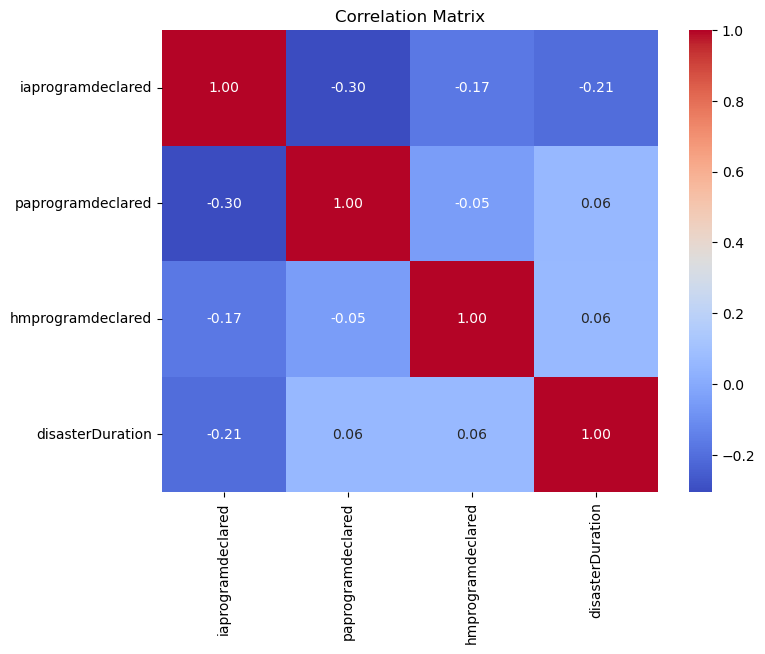

In [25]:
# Correlation analysis between program declarations and disaster duration
correlation_matrix = df[
    ["iaprogramdeclared", 
     "paprogramdeclared", 
     "hmprogramdeclared", 
     "disasterDuration"]
].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


C:\Users\onkar devkar\AppData\Local\Temp\ipykernel_32380\2599618032.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_duration_by_incident.values, y=avg_duration_by_incident.index, palette='magma')


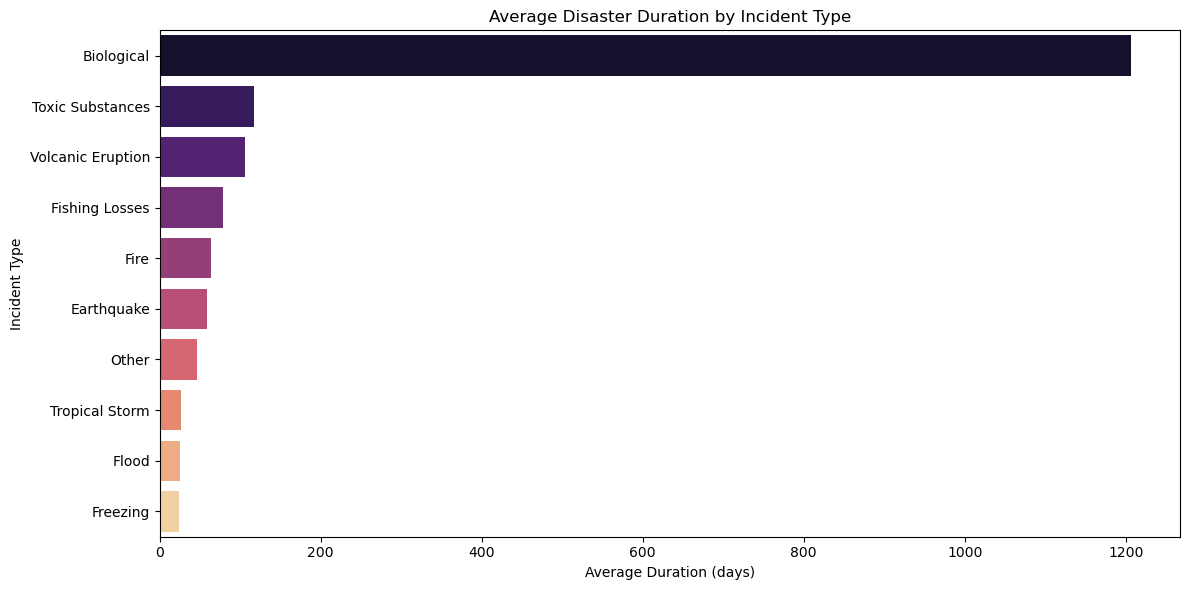

In [32]:
# average disaster duration by incident type
avg_duration_by_incident = df.groupby('incidenttype')['disasterduration'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_duration_by_incident.values, y=avg_duration_by_incident.index, palette='magma')
plt.title('Average Disaster Duration by Incident Type')
plt.xlabel('Average Duration (days)')
plt.ylabel('Incident Type')
plt.tight_layout()
plt.show()

## 📌 Step 9: Average Declarations Per Month

This provides a more professional seasonality measure by calculating the average declarations per month across all years.


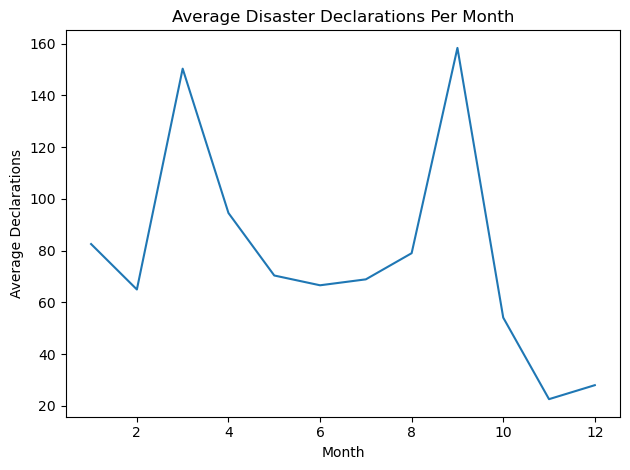

In [13]:
avg_monthly = df.groupby('month')['year'].count() / df['year'].nunique()

plt.figure()
avg_monthly.plot()
plt.title("Average Disaster Declarations Per Month")
plt.xlabel("Month")
plt.ylabel("Average Declarations")
plt.tight_layout()

plt.savefig(os.path.join(visuals_path, "06_Average_Monthly_Declarations.png"))
plt.show()


# 📌 Conclusion

Key Insights:

- Disaster declarations show noticeable variation over the years.
- Certain incident types dominate overall declarations.
- Some states are significantly more disaster-prone.
- Monthly analysis reveals seasonal patterns in disaster occurrences.

This EDA provides a strong foundation for further predictive modeling or dashboard development.
